1. Importa los datos del archivo, revisar dimensiones e imprimir primeros 15 datos. 

In [1]:
import pandas as pd #Importar librería
datos=pd.read_csv("A1.3 NASA.csv") #Leer datos del archivo
print("Dimensiones del data frame", datos.shape) #Revisar dimensiones con función shape
print(datos.head(15)) #Imprimir primeros 15 con función head

Dimensiones del data frame (1503, 6)
    frecuencia  angulo  longitud  velocidad   espesor  presion
0          800     0.0    0.3048       71.3  0.002663  126.201
1         1000     0.0    0.3048       71.3  0.002663  125.201
2         1250     0.0    0.3048       71.3  0.002663  125.951
3         1600     0.0    0.3048       71.3  0.002663  127.591
4         2000     0.0    0.3048       71.3  0.002663  127.461
5         2500     0.0    0.3048       71.3  0.002663  125.571
6         3150     0.0    0.3048       71.3  0.002663  125.201
7         4000     0.0    0.3048       71.3  0.002663  123.061
8         5000     0.0    0.3048       71.3  0.002663  121.301
9         6300     0.0    0.3048       71.3  0.002663  119.541
10        8000     0.0    0.3048       71.3  0.002663  117.151
11       10000     0.0    0.3048       71.3  0.002663  115.391
12       12500     0.0    0.3048       71.3  0.002663  112.241
13       16000     0.0    0.3048       71.3  0.002663  108.721
14         500    

2. Para escoger los datos de entrenamiento y los de validación, se utilizó la función sample que tiene como argumento frac que indica el porcentaje en decimal de datos que queremos que conserve. Utilizamos el 0.7 para el entrenamiento y con la función drop escogimos el resto de los datos para la validación. Revisamos cuantos datos son con la función shape. 

In [7]:
train=datos.sample(frac=.7) 
test = datos.drop(train.index) #Drop o soltamos los datos previamente escogidos para el entrenamiento
print("Train:", train.shape)
print("Test:",test.shape)
total=train.shape[0]+test.shape[0] #Verificamos si tener el total de datos
print("Total de datos: "total)

Train: (1052, 6)
Test: (451, 6)
1503


3. Entrenamos un modelo donde se explique la variable presion con las otras 5 variables en la base de datos, es decir, representamos la presion como una consecuencia de ellas. Las X las definimos como los datos de nuestro entrenamiento sin la presión y las Y son la presión. Creamos el modelo con la función OSL e imprimimos los resultados obtenidos. Después imprimimos los p values de cada variable. 

In [3]:
import statsmodels.api as sm #Importar librería
X = train.drop('presion', axis = 1) 
Y = train.presion
model = sm.OLS(Y,sm.add_constant(X))
results = model.fit()
print(results.summary())
print(results.pvalues)

                            OLS Regression Results                            
Dep. Variable:                presion   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     229.9
Date:                Wed, 20 Aug 2025   Prob (F-statistic):          1.31e-165
Time:                        19:42:58   Log-Likelihood:                -3125.3
No. Observations:                1052   AIC:                             6263.
Df Residuals:                    1046   BIC:                             6292.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        133.4952      0.645    206.961      0.0

4. Para asegurar cual variable es las más significativa para la salida, generamos modelos sin cada una de las variables y revisamos su estadístico F

In [14]:
Xprueba1 = train.drop(['presion', 'frecuencia'], axis = 1) 
Yprueba1 = train.presion
modelprueba1 = sm.OLS(Yprueba1,sm.add_constant(Xprueba1))
resultsprueba1 = modelprueba1.fit()
print("F value prueba sin frecuencia",resultsprueba1.fvalue)

Xprueba2 = train.drop(['presion', 'angulo'], axis = 1) 
Yprueba2 = train.presion
modelprueba2 = sm.OLS(Yprueba2,sm.add_constant(Xprueba2))
resultsprueba2 = modelprueba2.fit()
print("F value prueba sin angulo", resultsprueba2.fvalue)

Xprueba3 = train.drop(['presion', 'longitud'], axis = 1) 
Yprueba3 = train.presion
modelprueba3 = sm.OLS(Yprueba3,sm.add_constant(Xprueba3))
resultsprueba3 = modelprueba3.fit()
print("F value prueba sin longitud", resultsprueba3.fvalue)

Xprueba4 = train.drop(['presion', 'velocidad'], axis = 1) 
Yprueba4 = train.presion
modelprueba4 = sm.OLS(Yprueba4,sm.add_constant(Xprueba4))
resultsprueba4 = modelprueba4.fit()
print("F value prueba sin velocidad", resultsprueba4.fvalue)

Xprueba5 = train.drop(['presion', 'espesor'], axis = 1) 
Yprueba5 = train.presion
modelprueba5 = sm.OLS(Yprueba5,sm.add_constant(Xprueba5))
resultsprueba5 = modelprueba5.fit()
print("F value prueba sin espesor", resultsprueba5.fvalue)

F value prueba sin frecuencia 69.73771798250925
F value prueba sin angulo 247.82026113299528
F value prueba sin longitud 159.81321853507148
F value prueba sin velocidad 224.586508234921
F value prueba sin espesor 231.30396016438522


A partir de los resultados del análisis, se puede afirmar que todas las variables presentan una asociación lineal significativa con la salida, ya que sus p-values son extremadamente pequeños (mucho menores a 0.05), lo que indica que ninguna debe ser descartada desde el punto de vista estadístico. No obstante, al considerar el impacto práctico sobre el poder explicativo del modelo, se observa que la variable frecuencia es la más importante, ya que su exclusión provoca una disminución drástica del estadístico F de 229.9 a 69.7, evidenciando una fuerte pérdida en la capacidad predictiva del modelo. La variable longitud también es relevante, aunque en menor medida, mientras que velocidad, espesor y ángulo, aunque estadísticamente significativas, muestran un efecto más marginal sobre F, indicando que aportan información adicional pero con menor influencia en la explicación de la variable de salida.

5. Calcula el residual standard error y la 𝑅2 del modelo con los datos de entrenamiento y los de la validación. 

In [16]:
import scipy.stats as st
import numpy as np

RSE_train = np.sqrt(results.scale)
R2_train = results.rsquared  
print("Entrenamiento:")
print("Residual Standard Error (RSE):", RSE_train)
print("R^2:", R2_train)

Xtest=test.drop('presion', axis = 1)
YhatTest=results.predict(sm.add_constant(Xtest))
Ytest=test.presion
ybarTest=np.mean(Ytest)
RSS=sum((Ytest-YhatTest)**2)
TSS=sum((Ytest-ybarTest)**2)
R2Test=1-RSS/TSS
m=Xtest.shape[1]
n=Xtest.shape[0]
RSE=np.sqrt(RSS/(n-m-1))
print("Validación:")
print("Residual Standard Error (RSE):", RSE)
print("R^2:", R2Test)


Entrenamiento:
Residual Standard Error (RSE): 4.733753074067655
R^2: 0.5235910615308557
Validación:
Residual Standard Error (RSE): 4.687018836649398
R^2: 0.533944085028641


6. Generamos una gráfica para visualizar la precisión de nuestro modelo, haciendo un scatter con x como la presión real y y la presión predecida por nuestro modelo. 

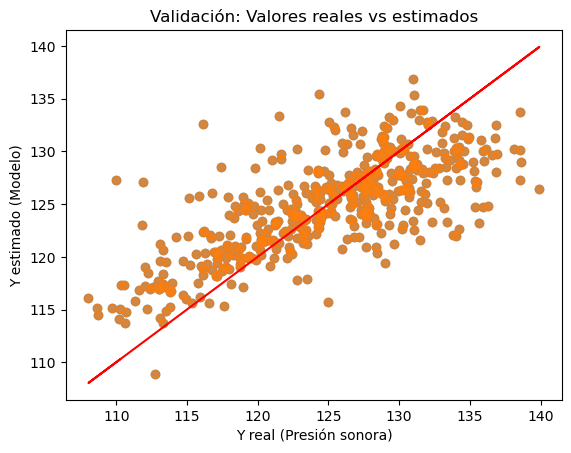

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
# Gráfica de dispersión: valores reales vs estimados
plt.scatter(Ytest, YhatTest, alpha=0.7)
plt.plot(Ytest, Ytest, color='red', label='y = x') #Grafico linea perfecta
plt.xlabel("Y real (Presión sonora)")
plt.ylabel("Y estimado (Modelo)")
plt.title("Validación: Valores reales vs estimados")
plt.show()

Aunque la gráfica no da una línea con pendiente 1 perfecta, podemos apreciar que si siguen esa tendencia los puntos y sí tienden a la línea deseada, por lo que podemos decir que nuestro modelo es efectivo (hasta cierto punto), pero evidentemente no perfecto. 